In [56]:
import os
print(os.listdir('C:\\Users\\Federico Nada\\Desktop\\DataFest/Notebooks'))

['.ipynb_checkpoints', 'Exploratory Analysis.ipynb', 'Standardize Values.ipynb', 'train.csv', 'train2.csv', 'Untitled.ipynb', 'Workout Strategies.ipynb']


In [57]:
import pandas as pd
import matplotlib.pyplot as plt

ratios = pd.read_csv('C:\\Users\\Federico Nada\\Desktop\\DataFest/Data for DataFest 2019/rpe.csv')

In [58]:
ratios['Date'] =  pd.to_datetime(ratios['Date'])
ratios.set_index('Date', inplace=True)
ratios.sort_values('Date', inplace = True)

In [59]:
import datetime as datetime
enddates = []
enddates.append('11/29/2017')
enddates.append('01/25/2018')
enddates.append('04/12/2018')
enddates.append('05/11/2018')
enddates.append('06/08/2018')
enddates.append('07/20/2018')
enddates = [datetime.datetime.strptime(x, '%m/%d/%Y') for x in enddates]

In [60]:
startdates = []
startdates.append('10/15/2017')
startdates.append('12/02/2017')
startdates.append('01/29/2018')
startdates.append('04/23/2018')
startdates.append('05/14/2018')
startdates.append('06/11/2018')
startdates = [datetime.datetime.strptime(x, '%m/%d/%Y') for x in startdates]

In [61]:
dubai =  ratios.loc[(ratios.index > startdates[0]) & (ratios.index < enddates[0])][['PlayerID' ,'AcuteChronicRatio']]
sydney =  ratios.loc[(ratios.index > startdates[1]) & (ratios.index < enddates[1])][['PlayerID' ,'AcuteChronicRatio']]
commonwealth =  ratios.loc[(ratios.index > startdates[2]) & (ratios.index < enddates[2])][['PlayerID' ,'AcuteChronicRatio']]
langford =  ratios.loc[(ratios.index > startdates[3]) & (ratios.index < enddates[3])][['PlayerID' ,'AcuteChronicRatio']]
paris =  ratios.loc[(ratios.index > startdates[4]) & (ratios.index < enddates[4])][['PlayerID' ,'AcuteChronicRatio']]
world =  ratios.loc[(ratios.index > startdates[5]) & (ratios.index < enddates[5])][['PlayerID' ,'AcuteChronicRatio']]

In [62]:
dubai_d = {}
for x in range(1, 18):
    dubai_d["dubai{0}".format(x)]= dubai[dubai['PlayerID'] == x].groupby(dubai[dubai['PlayerID'] == x].index).first()['AcuteChronicRatio'].values
sydney_d = {}
for x in range(1, 18):
    sydney_d["sydney{0}".format(x)]= sydney[sydney['PlayerID'] == x].groupby(sydney[sydney['PlayerID'] == x].index).first()['AcuteChronicRatio'].values
commonwealth_d = {}
for x in range(1, 18):
    commonwealth_d["commonwealth{0}".format(x)]= commonwealth[commonwealth['PlayerID'] == x].groupby(commonwealth[commonwealth['PlayerID'] == x].index).first()['AcuteChronicRatio'].values
langford_d = {}
for x in range(1, 18):
    langford_d["langford{0}".format(x)]= langford[langford['PlayerID'] == x].groupby(langford[langford['PlayerID'] == x].index).first()['AcuteChronicRatio'].values
paris_d = {}
for x in range(1, 18):
    paris_d["paris{0}".format(x)]= paris[paris['PlayerID'] == x].groupby(paris[paris['PlayerID'] == x].index).first()['AcuteChronicRatio'].values
world_d = {}
for x in range(1, 18):
    world_d["world{0}".format(x)]= world[world['PlayerID'] == x].groupby(world[world['PlayerID'] == x].index).first()['AcuteChronicRatio'].values

In [63]:
data = {**dubai_d, **sydney_d, **commonwealth_d,**langford_d, **paris_d, **world_d}

In [64]:
data_array = []
bins = 10

for i in range(1,18):
    data_array.append(pd.Series(data['dubai{}'.format(i)]).groupby(pd.cut(pd.Series(data['dubai{}'.format(i)]).index, bins)).max().interpolate().values)
for i in range(1,18):
    data_array.append(pd.Series(data['sydney{}'.format(i)]).groupby(pd.cut(pd.Series(data['sydney{}'.format(i)]).index, bins)).max().interpolate().values)
for i in range(1,18):
    data_array.append(pd.Series(data['commonwealth{}'.format(i)]).groupby(pd.cut(pd.Series(data['commonwealth{}'.format(i)]).index, bins)).max().interpolate().values)
for i in (1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17):
    data_array.append(pd.Series(data['langford{}'.format(i)]).groupby(pd.cut(pd.Series(data['langford{}'.format(i)]).index, bins)).max().interpolate().values)
for i in (1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17):
    data_array.append(pd.Series(data['paris{}'.format(i)]).groupby(pd.cut(pd.Series(data['paris{}'.format(i)]).index, bins)).max().interpolate().values)
for i in (1,2,3,4,5,6,7,8,10,11,13,14,15,16,17):
    data_array.append(pd.Series(data['world{}'.format(i)]).groupby(pd.cut(pd.Series(data['world{}'.format(i)]).index, bins)).max().interpolate().values)

In [65]:
ml2 = pd.DataFrame(data_array)
ml2['Tournament'] = pd.Series(['Dubai', 'Dubai', 'Dubai', 'Dubai', 'Dubai', 'Dubai', 'Dubai', 'Dubai', 'Dubai', 'Dubai', 'Dubai', 'Dubai', 'Dubai', 'Dubai', 'Dubai', 'Dubai', 'Dubai', 'Sydney', 'Sydney', 'Sydney', 'Sydney', 'Sydney', 'Sydney', 'Sydney', 'Sydney', 'Sydney', 'Sydney', 'Sydney', 'Sydney', 'Sydney', 'Sydney', 'Sydney', 'Sydney', 'Sydney', 'Commonwealth', 'Commonwealth', 'Commonwealth', 'Commonwealth', 'Commonwealth', 'Commonwealth', 'Commonwealth', 'Commonwealth', 'Commonwealth', 'Commonwealth', 'Commonwealth', 'Commonwealth', 'Commonwealth', 'Commonwealth', 'Commonwealth', 'Commonwealth', 'Commonwealth', 'Langford', 'Langford', 'Langford', 'Langford', 'Langford', 'Langford', 'Langford', 'Langford', 'Langford', 'Langford', 'Langford', 'Langford', 'Langford', 'Langford', 'Langford', 'Langford', 'Paris', 'Paris','Paris','Paris','Paris','Paris','Paris','Paris','Paris','Paris','Paris','Paris','Paris','Paris','Paris','Paris', 'World Cup', 'World Cup', 'World Cup', 'World Cup', 'World Cup', 'World Cup', 'World Cup', 'World Cup', 'World Cup', 'World Cup', 'World Cup', 'World Cup', 'World Cup', 'World Cup', 'World Cup'])
ml2['Player'] = pd.Series([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,1,2,3,4,5,6,7,8,10,11,13,14,15,16,17])

In [66]:
#SCALER
'''max = ml2.max(axis=1)
min = ml2.min(axis=1)
diff = max-min
for row in range(len(ml2)):
    for column in range(len(ml2.iloc[0])):
        ml2.iloc[row,column] = (ml2.iloc[row,column]-min[row]) / diff[row]'''

'max = ml2.max(axis=1)\nmin = ml2.min(axis=1)\ndiff = max-min\nfor row in range(len(ml2)):\n    for column in range(len(ml2.iloc[0])):\n        ml2.iloc[row,column] = (ml2.iloc[row,column]-min[row]) / diff[row]'

In [67]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
for i in range(2,7):
    kmeans = KMeans(n_clusters=i, random_state=10)
    cluster_labels = kmeans.fit_predict(ml2.iloc[:,0:10].dropna().values)

    silhouette_avg = silhouette_score(ml2.iloc[:,0:10].dropna().values,cluster_labels)
    print("For n_clusters =", i, "The average silhouette_score is :", silhouette_avg)

centers = kmeans.cluster_centers_

For n_clusters = 2 The average silhouette_score is : 0.5564823934367945
For n_clusters = 3 The average silhouette_score is : 0.18945860368846504
For n_clusters = 4 The average silhouette_score is : 0.19137200133653234
For n_clusters = 5 The average silhouette_score is : 0.19376474269230196
For n_clusters = 6 The average silhouette_score is : 0.2101471180446933


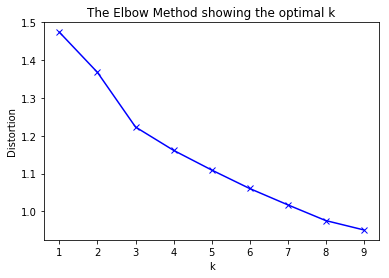

In [68]:
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(ml2.iloc[:,0:10].dropna().values)
    kmeanModel.fit(ml2.iloc[:,0:10].dropna().values)
    distortions.append(sum(np.min(cdist(ml2.iloc[:,0:10].dropna().values, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / ml2.dropna().values.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

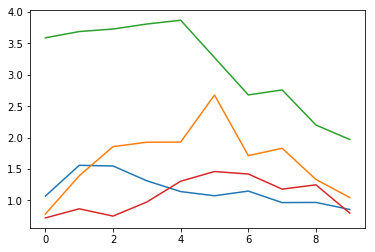

In [69]:
kmeans4 = KMeans(n_clusters=4)
kmeans4.fit_predict(ml2.iloc[:,0:10].dropna().values)
centers4 = kmeans4.cluster_centers_
for i in range(4):
    plt.plot(centers4[i])

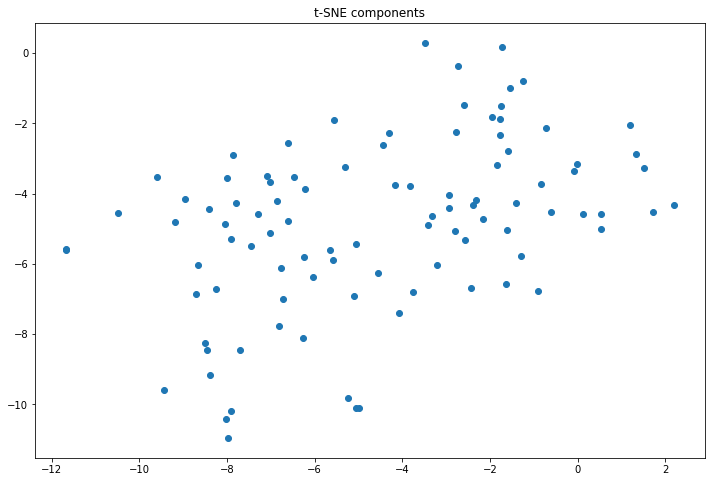

In [70]:
from sklearn.manifold import TSNE

X = TSNE(n_components = 2).fit_transform(ml2.iloc[:,0:10].dropna().values)

plt.figure(figsize=(12,8))
plt.title('t-SNE components')
plt.scatter(X[:,0], X[:,1])

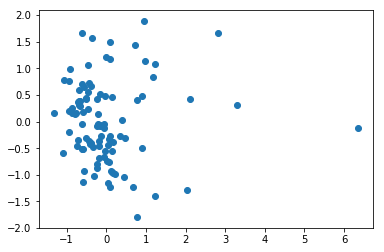

In [71]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(ml2.iloc[:,0:10].dropna().values)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'])

In [72]:
target = pd.read_csv('PlayerSpeedLabels.csv', index_col=[0])

In [73]:
target.sort_values('PlayerID')

,PlayerID,Tournament,Label,Speed
0,1,Commonwealth,-1,59.600000
1,1,Langford,1,171.000000
2,1,Paris,0,113.666667
3,1,Sydney,0,130.000000
4,1,World Cup,0,124.250000
10,2,World Cup,-1,30.500000
8,2,Paris,1,66.333333
9,2,Sydney,0,56.600000
6,2,Dubai,0,65.400000
5,2,Commonwealth,0,48.250000


In [74]:
ml2.sort_values('Player').head(10)

,0,1,2,3,4,5,6,7,8,9,Tournament,Player
0,0.68,0.01,0.05,0.87,2.24,2.20,1.38,1.08,1.17,1.20,Dubai,1
67,0.69,0.35,0.98,1.42,1.53,1.36,1.27,0.99,0.99,0.67,Paris,1
51,0.80,1.26,1.31,1.86,2.07,1.51,1.67,1.83,0.95,1.07,Langford,1
34,1.20,1.00,1.22,1.09,1.15,0.80,1.05,0.58,1.23,0.92,Commonwealth,1
17,1.30,1.36,0.97,0.85,0.89,0.80,0.81,0.84,1.62,1.40,Sydney,1
83,0.41,1.18,1.76,1.76,1.48,1.25,0.93,0.70,0.37,0.63,World Cup,1
18,0.96,1.54,1.49,1.10,0.81,1.33,1.35,1.35,0.88,0.58,Sydney,2
35,2.39,2.96,1.69,1.13,1.44,0.79,0.97,0.53,1.28,1.09,Commonwealth,2
52,0.84,1.31,1.12,1.98,1.87,1.51,1.55,0.92,0.70,0.80,Langford,2
68,0.74,0.74,0.51,1.05,1.27,0.96,0.98,1.29,1.29,0.97,Paris,2


In [75]:
ml2['index'] = ml2['Tournament'].map(str) + ml2['Player'].map(str)

In [76]:
target['index'] = target['Tournament'].map(str) + target['PlayerID'].map(str)

In [77]:
target.set_index('index', inplace=True)
ml2.set_index('index', inplace=True)

In [78]:
dataset = pd.concat((ml2, target), axis=1, join='inner')

In [79]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,Tournament,Player,PlayerID,Tournament,Label,Speed
index,,,,,,,,,,,,,,,,
Dubai2,0.55,0.67,0.81,1.01,1.02,1.88,1.83,1.51,1.15,0.66,Dubai,2,2,Dubai,0,65.40
Dubai3,1.27,1.17,0.67,0.68,1.25,2.40,2.40,1.42,1.06,0.53,Dubai,3,3,Dubai,0,42.40
Dubai4,0.55,1.18,1.02,0.59,1.25,1.48,1.24,1.20,0.93,0.48,Dubai,4,4,Dubai,0,33.75
Dubai6,0.84,1.13,0.48,0.97,1.54,1.55,1.40,1.57,1.21,0.52,Dubai,6,6,Dubai,0,33.00
Dubai7,0.73,1.08,1.04,0.70,1.12,1.59,1.33,1.36,1.09,0.62,Dubai,7,7,Dubai,0,68.60


In [80]:
dataset.columns = ['0', '1', '2', '3', '4','5', '6', '7', '8', '9', 'Tournament', 'Player', 'PlayerID', 'Tournament', 'Label', 'Speed']

In [81]:
dataset_ml = dataset.loc[:,['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']]

In [82]:
dataset.drop('Langford5', inplace=True)

In [83]:
'''import umap

umap_data = umap.UMAP(n_neighbors=5, min_dist=0.3, n_components=2, random_state=5).fit_transform(dataset_ml.dropna().values)
final = pd.DataFrame(umap_data)
final['label'] = dataset['Label'].values

plt.figure(figsize=(12,8))
plt.title('Decomposition using UMAP')
color = {1:"blue",0:"gray",-1:"red"}
final_array = final.values
for i in range(76):
    plt.scatter(final_array[i, 0], final_array[i, 1],color=color[final_array[i, 2]])'''
                

'import umap\n\numap_data = umap.UMAP(n_neighbors=5, min_dist=0.3, n_components=2, random_state=5).fit_transform(dataset_ml.dropna().values)\nfinal = pd.DataFrame(umap_data)\nfinal[\'label\'] = dataset[\'Label\'].values\n\nplt.figure(figsize=(12,8))\nplt.title(\'Decomposition using UMAP\')\ncolor = {1:"blue",0:"gray",-1:"red"}\nfinal_array = final.values\nfor i in range(76):\n    plt.scatter(final_array[i, 0], final_array[i, 1],color=color[final_array[i, 2]])'

In [84]:
dataset.to_csv('merged.csv')

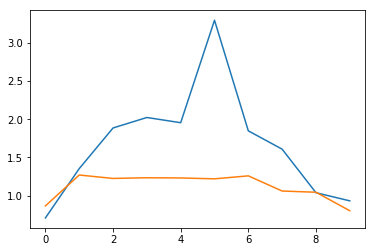

In [85]:
kmeans = KMeans(n_clusters=2)
kmeans.fit_predict(dataset.iloc[:,0:10].dropna().values)
centers = kmeans.cluster_centers_

for i in range(2):
    plt.plot(centers[i])

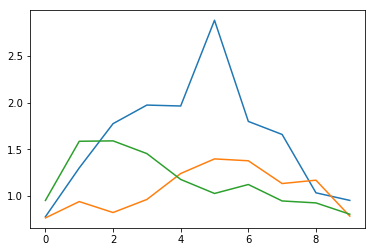

In [86]:
kmeans3 = KMeans(n_clusters=3)
kmeans3.fit_predict(dataset.iloc[:,0:10].dropna().values)
centers3 = kmeans3.cluster_centers_
for i in range(3):
    plt.plot(centers3[i])

In [91]:
dataset['Predict'] = kmeans3.labels_

In [92]:
dataset[['Predict', 'Speed']].corr()

,Predict,Speed
Predict,1.000000,-0.088297
Speed,-0.088297,1.000000


In [89]:
dataset.to_csv('10bin_3clusters.csv')

In [90]:
dataset.groupby('Predict')['Label'].value_counts()

Predict  Label
0         0        4
         -1        2
1         0       47
          1       12
         -1       11
Name: Label, dtype: int64